In [1]:
import tensorflow as tf

tf.config.list_physical_devices('GPU')

[]

In [2]:
fashion_mnist=tf.keras.datasets.fashion_mnist
(train_images,train_labels),(valid_images, valid_labels)=fashion_mnist.load_data()

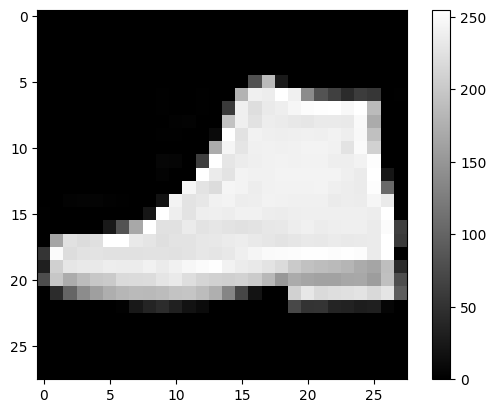

In [3]:
import matplotlib.pyplot as plt
data_idx=42

plt.figure()
plt.imshow(train_images[data_idx],cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

In [4]:
train_labels[data_idx]

9

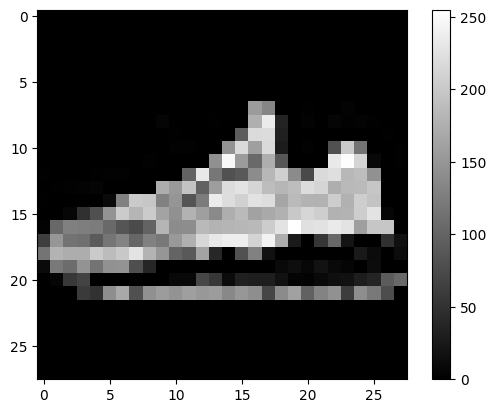

In [5]:
import matplotlib.pyplot as plt
data_idx=6174

plt.figure()
plt.imshow(valid_images[data_idx],cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

In [6]:
valid_labels[data_idx]

7

In [7]:
valid_images[data_idx]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [8]:
number_of_classes=train_labels.max()+1
number_of_classes

10

In [9]:
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(number_of_classes)
    ])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
image_height=28
image_width=28

In [12]:
number_of_weights=image_height*image_width*number_of_classes
number_of_weights

7840

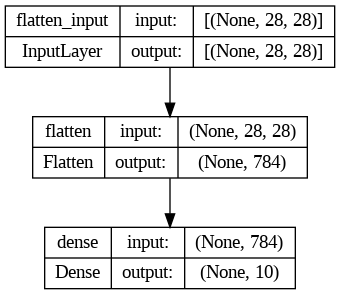

In [13]:
tf.keras.utils.plot_model(model,show_shapes=True)

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
history = model.fit(
    train_images,
    train_labels,
    epochs=5,
    verbose=True,
    validation_data=(valid_images, valid_labels)
)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 16.8368 - accuracy: 0.7482 - val_loss: 14.2402 - val_accuracy: 0.7744
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 12.0207 - accuracy: 0.7913 - val_loss: 11.6243 - val_accuracy: 0.7878
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 11.2040 - accuracy: 0.7962 - val_loss: 11.0549 - val_accuracy: 0.8009
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 10.9005 - accuracy: 0.8002 - val_loss: 10.9549 - val_accuracy: 0.8028
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 10.3995 - accuracy: 0.8018 - val_loss: 18.1182 - val_accuracy: 0.6996


In [17]:
model.predict(train_images[0:10])

1/1 [==============================] - 0s 128ms/step


array([[-3.60590881e+02, -5.67229675e+02, -3.07111450e+02,
        -2.20206009e+02, -3.59421021e+02,  2.73085144e+02,
        -1.07275715e+01,  3.01331848e+02, -2.28834114e+01,
         4.24347473e+02],
       [ 3.43594086e+02, -1.32164108e+02,  2.32427856e+02,
         1.70031021e+02,  6.35704308e+01, -1.11341919e+03,
         3.57339752e+02, -1.96915552e+03, -8.38594360e+01,
        -7.34862671e+02],
       [ 7.92229004e+01,  8.25020218e+01,  6.62504425e+01,
         1.23286491e+02,  9.08645630e+01, -4.28559937e+02,
         1.04801598e+02, -5.77678223e+02, -6.93750458e+01,
        -2.88417267e+02],
       [ 1.64548767e+02,  1.35803253e+02,  1.57112686e+02,
         2.28678131e+02,  1.57836182e+02, -6.39157532e+02,
         2.30446671e+02, -1.09407166e+03, -8.43882446e+01,
        -6.71364990e+02],
       [ 1.46733093e+02,  2.95951294e+02,  7.22536545e+01,
         2.51893982e+02,  1.98551682e+02, -7.91206116e+02,
         1.63959061e+02, -8.19734375e+02, -9.59572754e+01,
        -8.

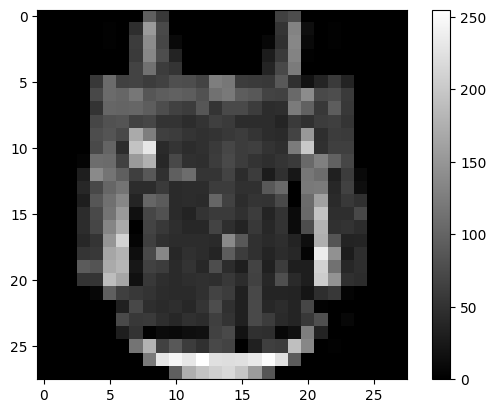

1/1 [==============================] - 0s 26ms/step


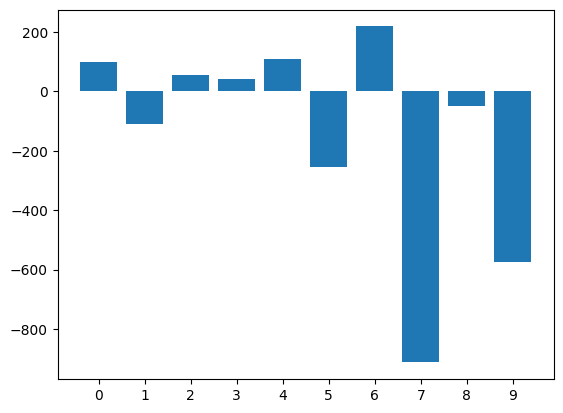

correct answer:  6


In [20]:
data_idx=8675

plt.figure()
plt.imshow(train_images[data_idx],cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

x_values=range(number_of_classes)
plt.figure()
plt.bar(x_values, model.predict(train_images[data_idx:data_idx+1]).flatten())
plt.xticks(range(10))
plt.show()

print("correct answer: ",train_labels[data_idx])
